## HW9
#### 111261022
#### Exercise 1

Calculate and plot the final posterior distribution.
Calculate the mean and standard deviation of the variable using P(s).
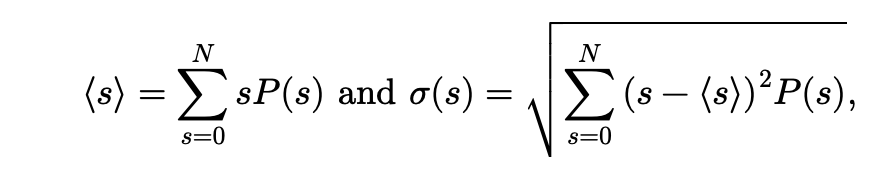

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
population = 100
ss = np.arange(population+1) # Consider a population of 20
ps0 = np.ones_like(ss)/len(ss) # Uniform prior probability
pas = ss / population
pbs = 1 - pas

In [3]:
seq = ['B','B','B','A','B','A','B','A','A','B','A','B','B','B','B']
ps = ps0.copy()
for r in seq:
    if r == 'A':
        ps = ps * pas
    else:
        ps = ps * pbs
    ps = ps / ps.sum() # 歸一化

# 計算平均值和標準差
mean_s = np.sum(ss * ps)
variance_s = np.sum((ss - mean_s)**2 * ps)
std_s = np.sqrt(variance_s)

print(f"--- Exercise 1 ---")
print(f"族群大小 (N): {population}")
print(f"響應序列: {''.join(seq)}")
print(f"序列中 'A' 的次數: {seq.count('A')}")
print(f"序列中 'B' 的次數: {seq.count('B')}")
print(f"P(s) 的平均值 <s_N>: {mean_s:.4f}")
print(f"P(s) 的標準差 sigma(s): {std_s:.4f}")

--- Exercise 1 ---
族群大小 (N): 100
響應序列: BBBABABAABABBBB
序列中 'A' 的次數: 5
序列中 'B' 的次數: 10
P(s) 的平均值 <s_N>: 35.2941
P(s) 的標準差 sigma(s): 11.2638


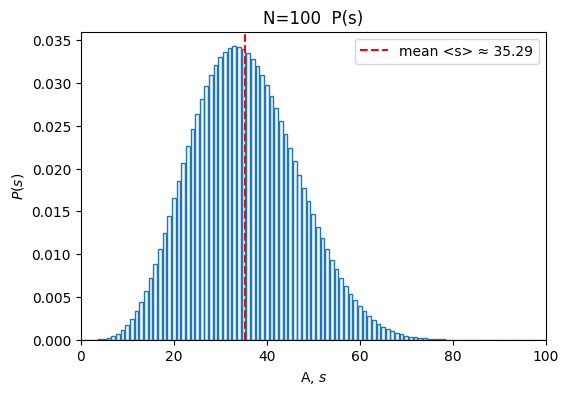

In [4]:
plt.figure(figsize=(6, 4))
plt.bar(ss, ps, facecolor="#0080ff10", edgecolor='C0')
plt.xlabel(r'A, $s$')
plt.ylabel('$P(s)$')
plt.title(f'N={population}  P(s)')
plt.axvline(mean_s, color='r', linestyle='--', label=f'mean <s> ≈ {mean_s:.2f}')
plt.legend()
plt.ylim(0,)
plt.xlim(0, population)
plt.show()

#### Exercise 2.1

In [5]:
data = np.load('hw09-data.npz', allow_pickle=True)
dat = data['dat'].item()
r_values = sorted(dat.keys())

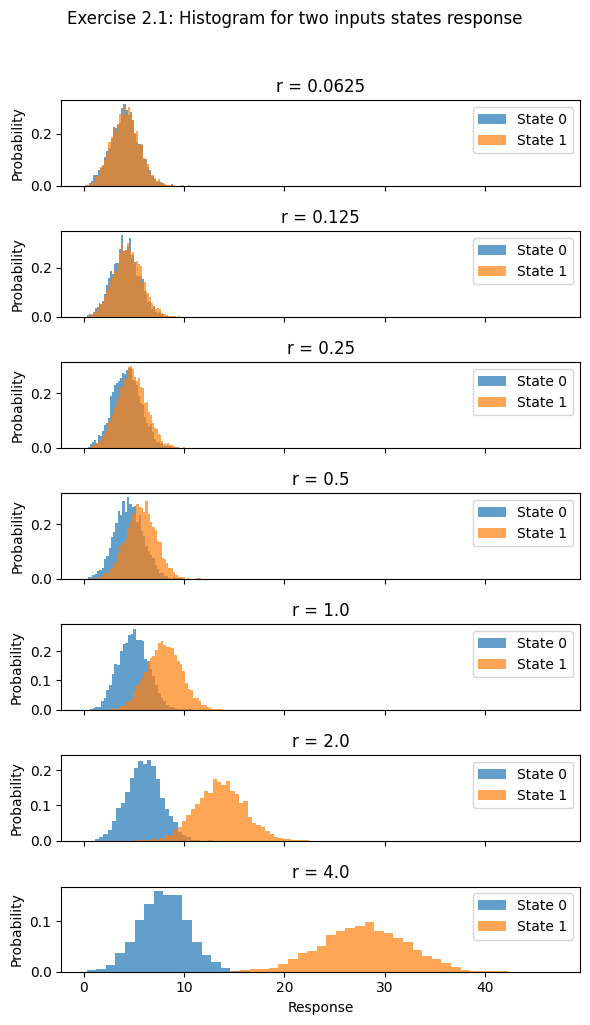

In [6]:
# 2.1 繪製直方圖
fig, axes = plt.subplots(len(r_values), 1, figsize=(6, 10), sharex=True)
fig.suptitle('Exercise 2.1: Histogram for two inputs states response', y=1.02)

for ax, r in zip(axes, r_values):
    # 獲取兩個狀態的數據 (row 0 和 row 1)
    resp0 = dat[r][0]
    resp1 = dat[r][1]

    # 繪製直方圖
    bins = np.linspace(min(resp0.min(), resp1.min()), max(resp0.max(), resp1.max()), 50)
    ax.hist(resp0, bins=bins, alpha=0.7, label='State 0', density=True)
    ax.hist(resp1, bins=bins, alpha=0.7, label='State 1', density=True)

    ax.set_title(f'r = {r}')
    ax.set_ylabel('Probability')
    ax.legend(loc='upper right')

axes[-1].set_xlabel('Response')
plt.tight_layout()
plt.show()

#### Exercise 2.2

In [7]:
d_primes = []
r_values_float = []

for r in r_values:
    resp0 = dat[r][0] # 狀態 0 的 4096 次試驗
    resp1 = dat[r][1] # 狀態 1 的 4096 次試驗

    # 計算平均值
    mean0 = np.mean(resp0)
    mean1 = np.mean(resp1)

    # 計算標準差
    std0 = np.std(resp0)
    std1 = np.std(resp1)

    # 分子：平均值之差的絕對值
    mean_diff = np.abs(mean0 - mean1)

    # 分母：使用兩個分佈的標準差平均值 [cite: 131, 132]
    std_avg = (std0 + std1) / 2

    # 計算 d'
    if std_avg == 0:
        d_prime = 0
    else:
        d_prime = mean_diff / std_avg

    d_primes.append(d_prime)
    r_values_float.append(float(r))

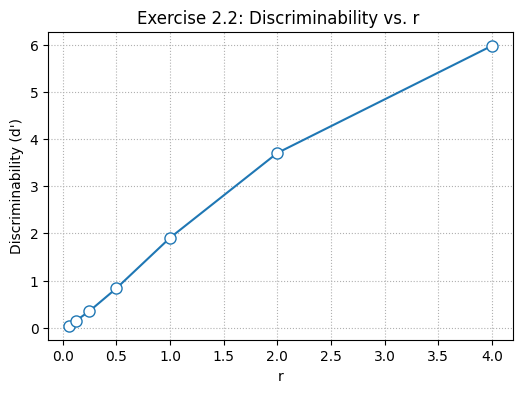

In [8]:
plt.figure(figsize=(6, 4))
plt.plot(r_values_float, d_primes, 'o-', markerfacecolor='w', markersize=8)
plt.xlabel('r')
plt.ylabel("Discriminability (d')")
plt.title("Exercise 2.2: Discriminability vs. r ")
plt.grid(True, linestyle=':')
plt.show()